In [ ]:
# WINE QUALITY THEORETICAL PROJECT

This notebook is for exploring wine quality parameters, identifying the best estimator to use, identify key features in the data and identifying the way to optimally capture the relevant data.

Taking the following approach

* Problem definition
* Data
* Features
* Modelling
* Experimentation

1. Problem Definition.

In a statement:

>    Many wine farms do capture data but few capture the correct data, this notebook aims to identify the feature importances of a comprehensive dataset about wine quality parameters and the best suited estimator to use for this issue in future

# 2. Data

The wine data used in this project can be found at: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/winequality-white.csv

# 3. Evaluation

If I can reach at least 95% accuracy at predicting the quality score of a wine grape during proof of concept, this model could be pursued for deployment.

For the purpose of classification, it is assumed that the winery wants to improve the quality of their wines and thus wishes to identify which parameters of wine quality needs to be focused on for wines scoring a target score of 6-8.

# 4. Features

Data Dictionary:

* fixed acidity:
* volatile acidity:
* citric acid:
* residual sugar:
* chlorides:
* free sulfur dioxide:
* density:
* pH:
* sulphates:
* alcohol:
* quality:


In [2]:
## Preparing Basic Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Want plots inside this notebook
%matplotlib inline


# Models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#### 1. Loading the data

In [3]:
quality_data = pd.read_csv("winequality-white.csv")
quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
quality_data.shape

(4898, 12)

In [5]:
len(quality_data)

4898

In [6]:
quality_data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.0

In [7]:
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
quality_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
quality_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [10]:
quality_data["quality"].value_counts

<bound method IndexOpsMixin.value_counts of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

In [11]:
quality_data["quality"].min(), quality_data["quality"].max(), quality_data["quality"].mean(), quality_data["quality"].median()

(3, 9, 5.87790935075541, 6.0)

#### 1.1 Exploratory Data Analysis



To get a more detailed view of the white wine data and quality, write a function that:
Calculates the following for every column:
* Minimum
* Maximum
* Average
* Mean
* Median              

In [12]:
quality_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
def calculate_summary_statistics(quality_data):
    
    # Calculate statistics for each numeric column
    summary_stats = {}
    for column in quality_data.columns:
        if pd.api.types.is_numeric_dtype(quality_data[column]):
            column_data = quality_data[column]
            summary_stats[column] = {
                'Min': column_data.min(),
                'Max': column_data.max(),
                'Mean': np.mean(column_data),
                'Median': column_data.median()
            }
    
    return summary_stats

In [14]:
summary_statistics = calculate_summary_statistics(quality_data)
print(summary_statistics)

{'fixed acidity': {'Min': 3.8, 'Max': 14.2, 'Mean': 6.854787668436097, 'Median': 6.8}, 'volatile acidity': {'Min': 0.08, 'Max': 1.1, 'Mean': 0.27824111882400976, 'Median': 0.26}, 'citric acid': {'Min': 0.0, 'Max': 1.66, 'Mean': 0.33419150673744386, 'Median': 0.32}, 'residual sugar': {'Min': 0.6, 'Max': 65.8, 'Mean': 6.391414863209474, 'Median': 5.2}, 'chlorides': {'Min': 0.009, 'Max': 0.346, 'Mean': 0.04577235606369946, 'Median': 0.043}, 'free sulfur dioxide': {'Min': 2.0, 'Max': 289.0, 'Mean': 35.30808493262556, 'Median': 34.0}, 'total sulfur dioxide': {'Min': 9.0, 'Max': 440.0, 'Mean': 138.36065741118824, 'Median': 134.0}, 'density': {'Min': 0.98711, 'Max': 1.03898, 'Mean': 0.9940273764801959, 'Median': 0.99374}, 'pH': {'Min': 2.72, 'Max': 3.82, 'Mean': 3.1882666394446715, 'Median': 3.18}, 'sulphates': {'Min': 0.22, 'Max': 1.08, 'Mean': 0.48984687627603113, 'Median': 0.47}, 'alcohol': {'Min': 8.0, 'Max': 14.2, 'Mean': 10.514267047774602, 'Median': 10.4}, 'quality': {'Min': 3, 'Max': 

In [15]:
# Check for missing values
quality_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

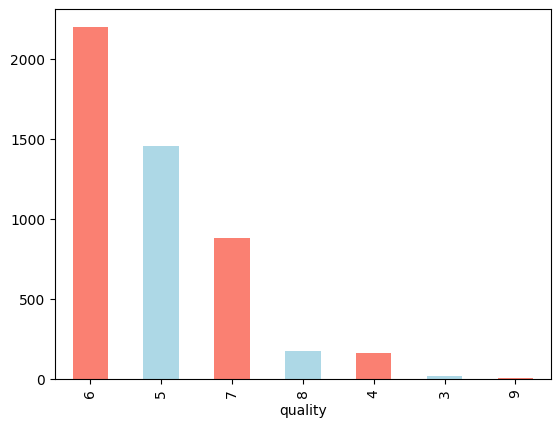

In [16]:
quality_data["quality"].value_counts().plot(kind="bar",
                                            color=["salmon", "lightblue"]);

In [17]:
# Let's rename the column headings to be more user friendly.
quality_data.rename(columns={'fixed acidity': 'fixed_acidity', 
                             'volatile acidity': 'volatile_acidity',
                             'residual sugar': 'residual_sugar',
                             'free sulfur dioxide': 'free_sulfur_dioxide',
                             'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

quality_data.head()

,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0, 0.5, 'pH')

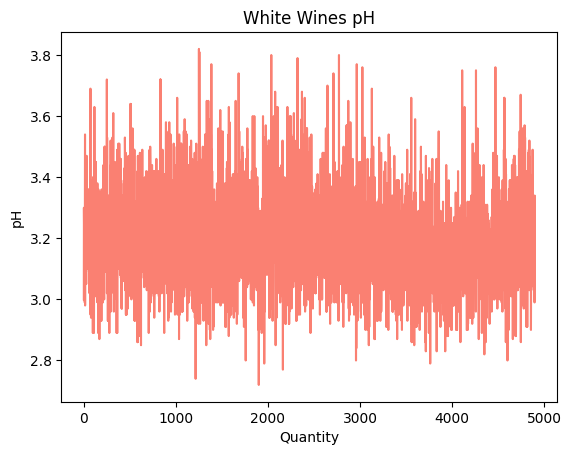

In [18]:
quality_data["pH"].plot(kind="line",
                        color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wines pH")
plt.xlabel("Quantity")
plt.ylabel("pH")

In [19]:
quality_data["chlorides"].max() - quality_data["chlorides"].min()

0.33699999999999997

In [20]:
quality_data["residual_sugar"].max() - quality_data["residual_sugar"].min()

65.2

In [21]:
# This is a big difference between the highest recorded residual sugar content and lowest.
# Maybe there are outliers affecting this?
# Lets check by visualizing the residual_sugar column data

Text(0, 0.5, 'Residaul Sugar (Balling)')

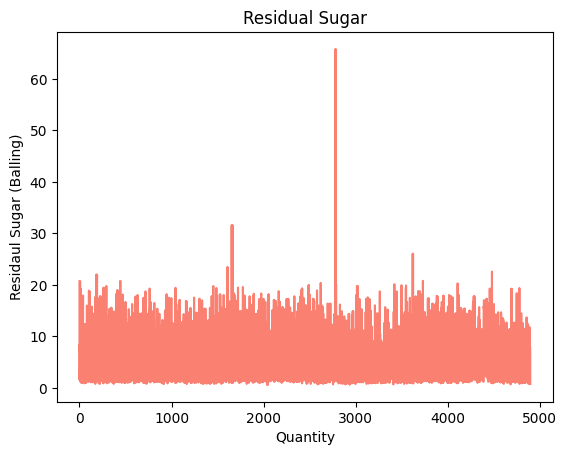

In [22]:
quality_data["residual_sugar"].plot(kind="line",
                                    color=["salmon", "lightblue"]);

# Add some information to the chart
plt.title("Residual Sugar")
plt.xlabel("Quantity")
plt.ylabel("Residaul Sugar (Balling)")

##### Continue with EDA after `feature importance` has been done on the best performing model

## Data Manipulation

In [23]:
quality_data.head().T

,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


#### Adding a `target` column

* If the white wine quality is 6 or higher, we want to assign a `target` value of 1
* If the white wine quality is less then 6, we want to assign a `target` value of 1

In [24]:
# Have another look at quality 
quality_data["quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [25]:
2198 + 1457 + 880 + 175 + 163 +20 +5 

4898

In [26]:
# %6, %7, %8, %9
2198/4898, 880/4989, 175/4989, 5/4989

(0.44875459371171905,
 0.17638805371818,
 0.035077169773501705,
 0.0010022048506714773)

In [27]:
# Check the % of quality 6 or higher
(2198 + 880 + 175 + 5)/4898

0.6651694569211923

In [28]:
# Adding the target column for use in our Classification problem

# Define a function to map quality to target
def map_quality_to_target(quality):
    if quality < 6:
        return 0
    else:
        return 1

# Apply the mapping function to create the "target" column
quality_data['target'] = quality_data['quality'].apply(lambda x: map_quality_to_target(x))

# Display the updated DataFrame
quality_data.head().T


,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [29]:
quality_data.tail(50).T

,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,...,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897
fixed_acidity,7.00000,6.40000,7.00000,6.40000,6.20000,5.20000,6.200000,7.10000,7.10000,7.50000,...,6.8000,4.9000,6.10000,5.70000,6.50000,6.20000,6.6000,6.50000,5.50000,6.00000
volatile_acidity,0.36000,0.33000,0.36000,0.33000,0.23000,0.25000,0.350000,0.23000,0.23000,0.38000,...,0.2200,0.2350,0.34000,0.21000,0.23000,0.21000,0.3200,0.24000,0.29000,0.21000
citric acid,0.35000,0.44000,0.35000,0.44000,0.38000,0.23000,0.290000,0.39000,0.39000,0.33000,...,0.3600,0.2700,0.29000,0.32000,0.38000,0.29000,0.3600,0.19000,0.30000,0.38000
residual_sugar,2.50000,8.90000,2.50000,8.90000,1.60000,1.40000,3.900000,13.70000,13.70000,9.20000,...,1.2000,11.7500,2.20000,0.90000,1.30000,1.60000,8.0000,1.20000,1.10000,0.80000
chlorides,0.04800,0.05500,0.04800,0.05500,0.04400,0.04700,0.041000,0.05800,0.05800,0.04300,...,0.0520,0.0300,0.03600,0.03800,0.03200,0.03900,0.0470,0.04100,0.02200,0.02000
free_sulfur_dioxide,67.00000,52.00000,67.00000,52.00000,12.00000,20.00000,22.000000,26.00000,26.00000,19.00000,...,38.0000,34.0000,25.00000,38.00000,29.00000,24.00000,57.0000,30.00000,20.00000,22.00000
total_sulfur_dioxide,161.00000,164.00000,161.00000,164.00000,113.00000,77.00000,79.000000,172.00000,172.00000,116.00000,...,127.0000,118.0000,100.00000,121.00000,112.00000,92.00000,168.0000,111.00000,110.00000,98.00000
density,0.99146,0.99488,0.99146,0.99488,0.99176,0.99001,0.990050,0.99755,0.99755,0.99444,...,0.9933,0.9954,0.98938,0.99074,0.99298,0.99114,0.9949,0.99254,0.98869,0.98941
pH,3.05000,3.10000,3.05000,3.10000,3.30000,3.32000,3.100000,2.90000,2.90000,3.08000,...,3.0400,3.0700,3.06000,3.24000,3.29000,3.27000,3.1500,2.99000,3.34000,3.26000
sulphates,0.56000,0.48000,0.56000,0.48000,0.73000,0.62000,0.590000,0.46000,0.46000,0.42000,...,0.5400,0.5000,0.44000,0.46000,0.54000,0.50000,0.4600,0.46000,0.38000,0.32000


Now that the `target` column is inserted to the quality_data DataFrame, save a copy and start Modelling

In [30]:
# Save the DataFrame to a CSV file
quality_data.to_csv('quality_data_targets.csv', index=False)


In [31]:
# Load the DataFrame from a CSV file
quality_data_targets = pd.read_csv('quality_data_targets.csv')
quality_data_targets.head().T

,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


## Modeling
### Choosing the best estimator for our Classifaction problem

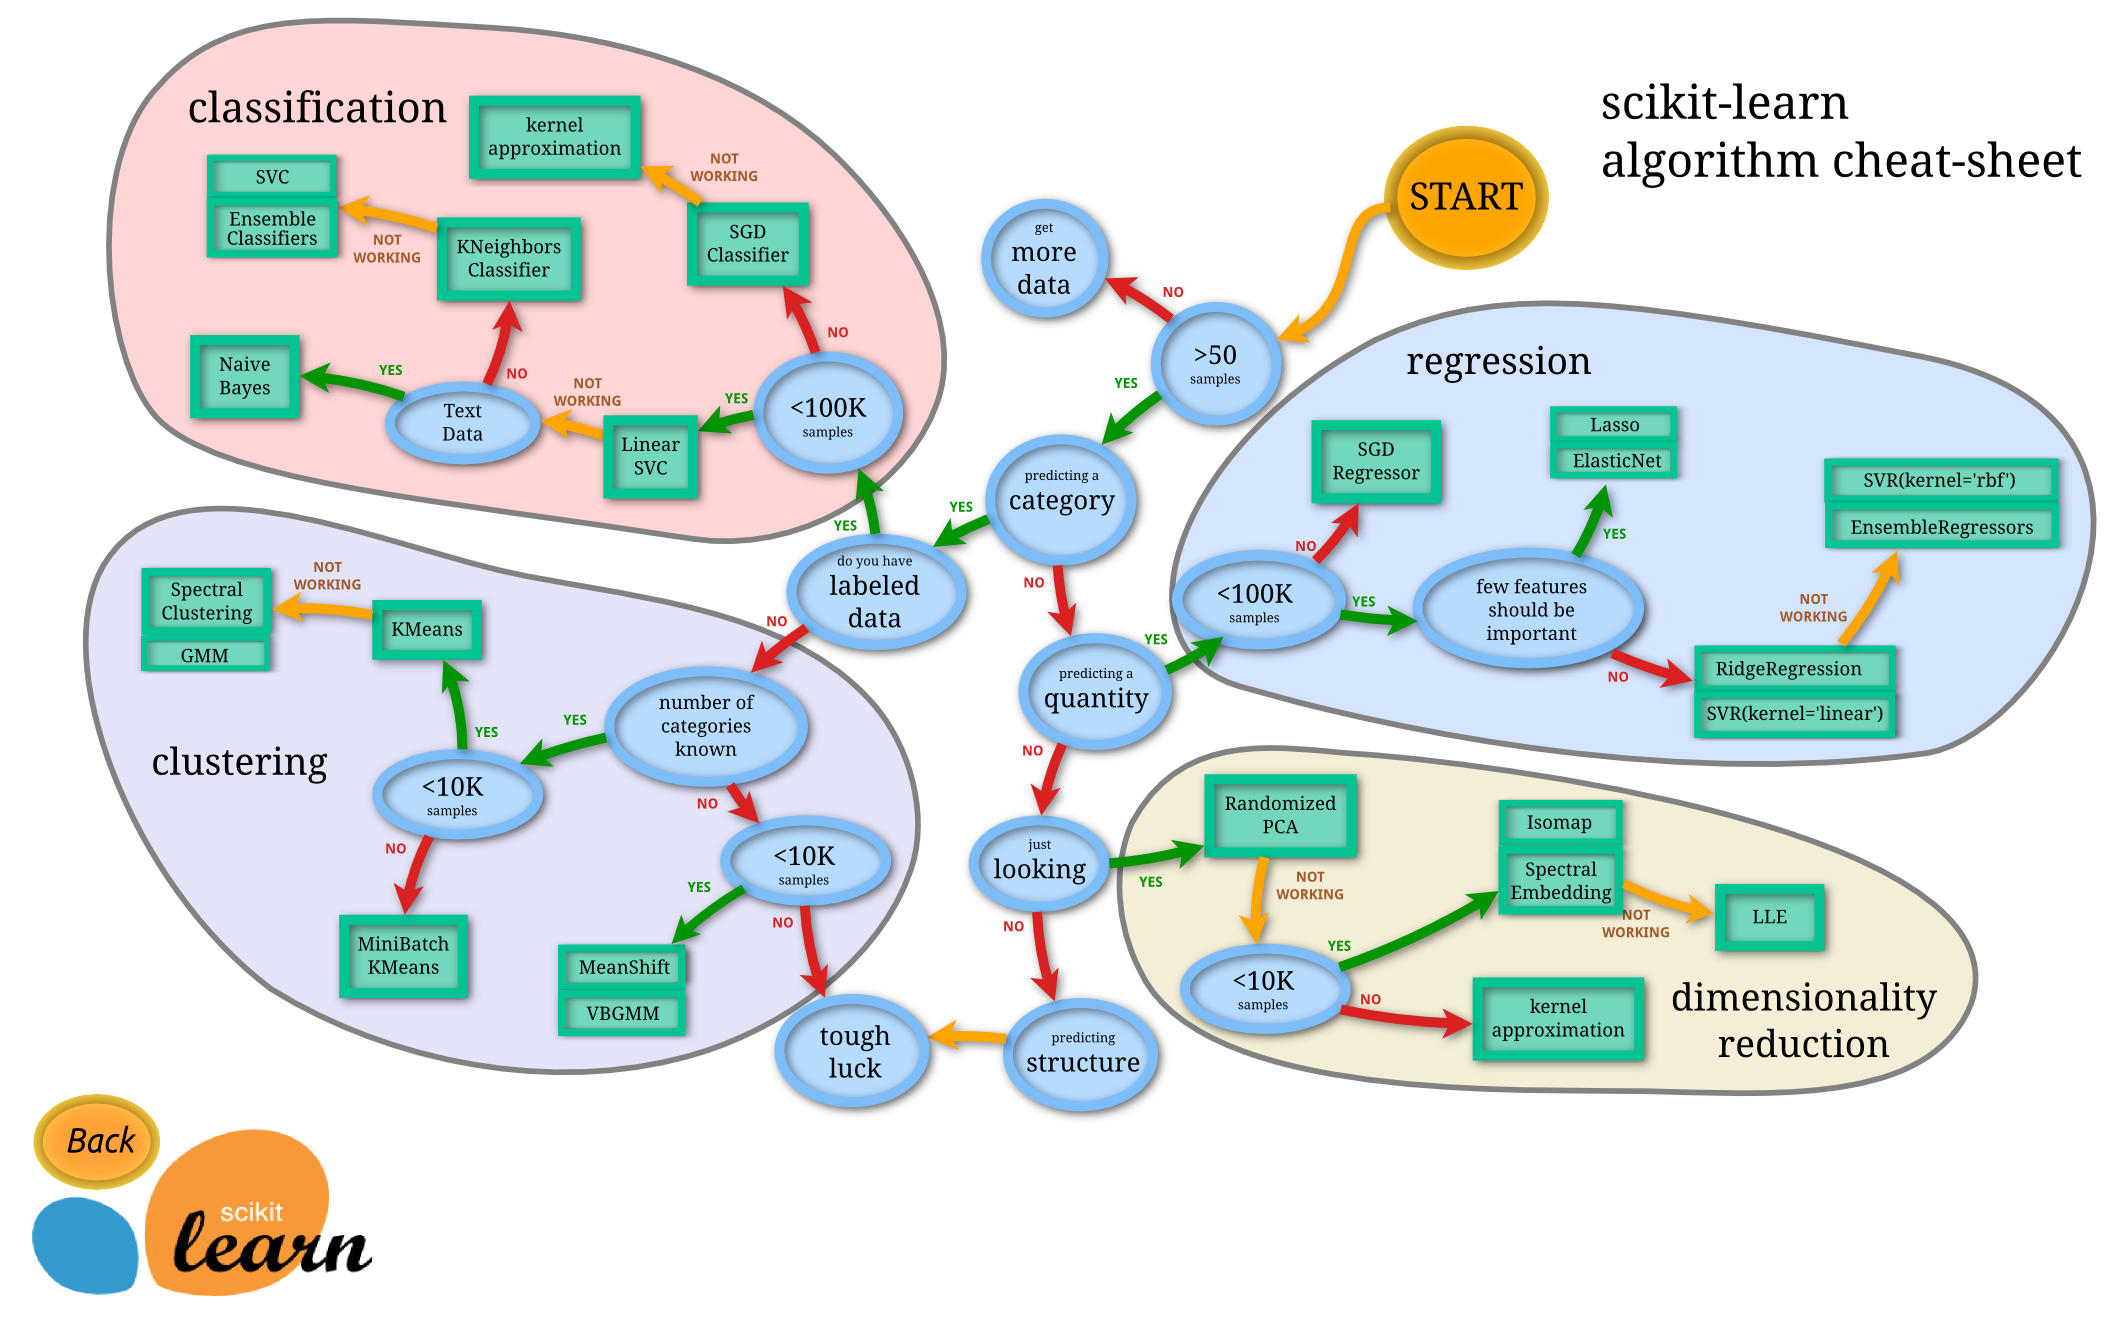


#### Estimators according Scikit_Learn map
* Linear SVC
* Logistic Regression
* KNeighbours Classifiers
* RandomForestClassifier

In [32]:
# 1. Splitting the data into X and y
X = quality_data.drop("target", axis=1)

y = quality_data["target"]

In [33]:
X.head().T

,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [35]:
# 2. Splitting the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [36]:
# 3. Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "LinearSVC": LinearSVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [37]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/home/jupyter/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jupyter/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/jupyter/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.9979591836734694,
 'KNN': 0.7448979591836735,
 'Random Forest': 1.0,
 'LinearSVC': 0.9989795918367347}

Q: From the above it seems the estimators are overfitting?
A: At least the model is learning

## Model Comparison

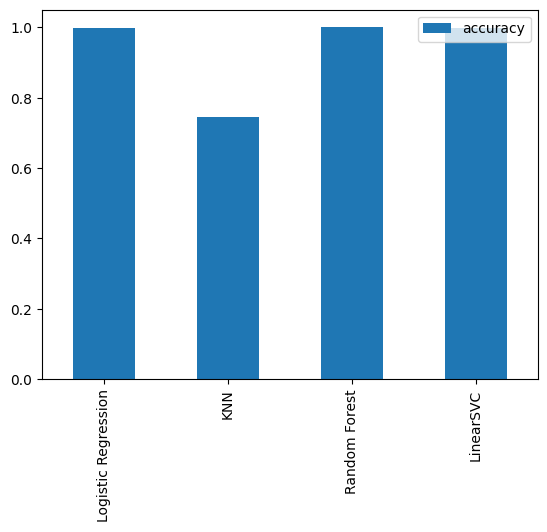

In [38]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now I have baseline models... we shouldn't always base our next steps off this. What does next steps look like? Look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Recall
* Classification report
* ROC curve
* Area under the curve (AUC)

## For the purpose of this exploratory project, proceeding with `RandomForestClassifier()`

In [39]:
# Setup random seed
np.random.seed(42)

# Create a hyperparameter grid of RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_qd = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=150,
                           verbose=True)

# Fit random hyperparamter search model for RandomForestClassifier()
rs_qd.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=150,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_qd.best_params_

{'n_estimators': 910,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [41]:
rs_qd.score(X_test, y_test)

1.0

In [42]:
# Get feature importances
importances = rs_qd.feature_importances_

# Create a DataFrame to display the importances alongside feature names (if available)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)


AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [43]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the hyperparameters as needed

# Fit the classifier to the data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display the importances alongside feature names (if available)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                 Feature  Importance
11               quality    0.803696
10               alcohol    0.055518
1       volatile_acidity    0.032453
7                density    0.031538
5    free_sulfur_dioxide    0.016580
4              chlorides    0.015081
2            citric acid    0.009909
6   total_sulfur_dioxide    0.009710
3         residual_sugar    0.008746
0          fixed_acidity    0.006082
8                     pH    0.005816
9              sulphates    0.004870


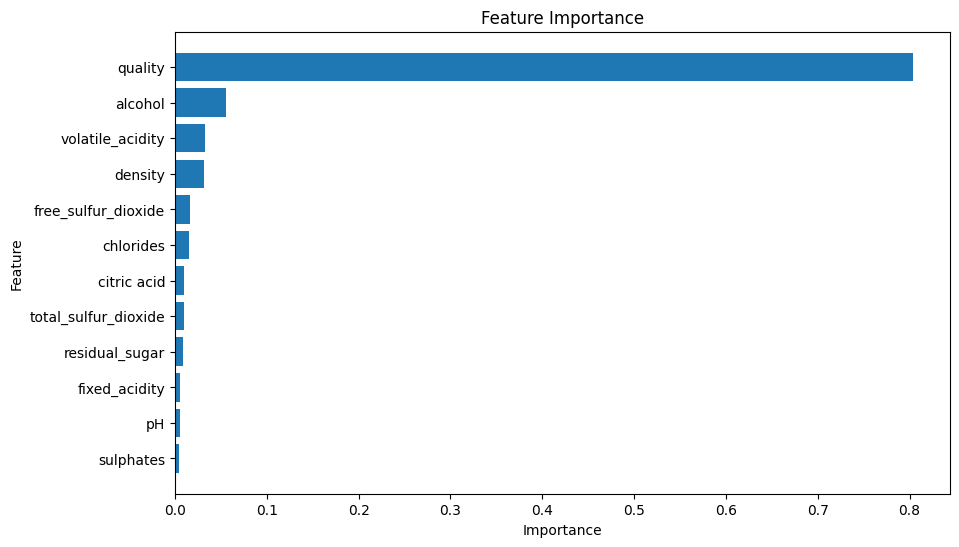

In [45]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


#### The feature importances are now identified, however let's fit another RandomForestClassifier to the dataframe and drop the `quality` column

In [46]:
# 1.1 Splitting the data into X and y
X = quality_data.drop("target", "quality", axis=1)

y = quality_data["target"]

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [47]:
quality_data_targets = pd.read_csv("quality_data_targets.csv")
quality_data_targets.head().T            

,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [48]:
# Remove a column by specifying its name

quality_data_targets.head()


,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [49]:
quality_data_1 = quality_data.drop("quality", axis=1)
quality_data_1.head().T

,0,1,2,3,4
fixed_acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile_acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual_sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free_sulfur_dioxide,45.000,14.000,30.0000,47.0000,47.0000
total_sulfur_dioxide,170.000,132.000,97.0000,186.0000,186.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [50]:
# 1.1 Split the data
X = quality_data_1.drop("target", axis=1)

y = quality_data_1["target"]

In [51]:
# 2. Splitting the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [52]:
# Initialize the RandomForestClassifier
clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the hyperparameters as needed

# Fit the classifier to the data
clf_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
clf_1.score(X_test, y_test)

0.8418367346938775

In [54]:
# Get feature importances
importances = clf_1.feature_importances_

# Create a DataFrame to display the importances alongside feature names (if available)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.143438
1       volatile_acidity    0.122472
7                density    0.110712
5    free_sulfur_dioxide    0.097123
6   total_sulfur_dioxide    0.085071
3         residual_sugar    0.082172
2            citric acid    0.080450
4              chlorides    0.079805
8                     pH    0.071211
0          fixed_acidity    0.064286
9              sulphates    0.063260


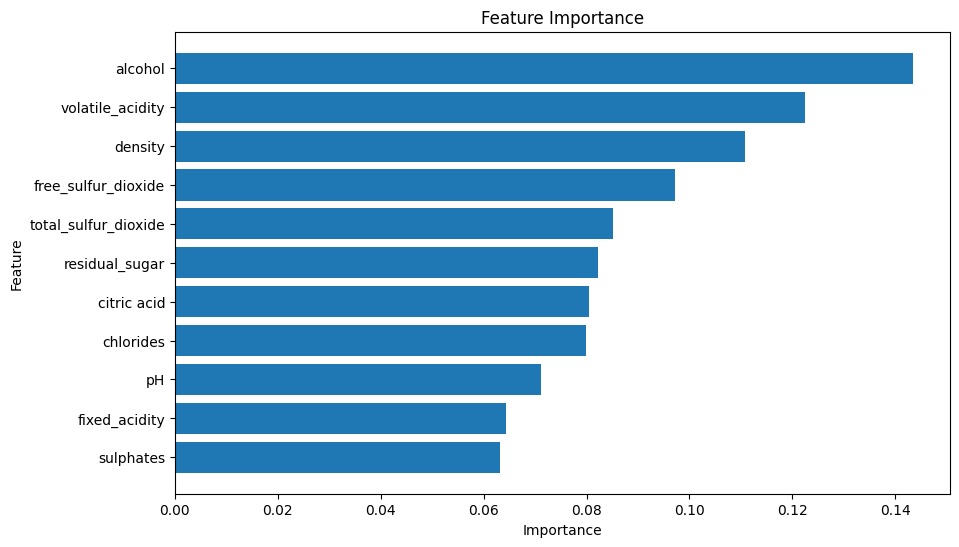

In [55]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


## MODEL Driven EDA

Findings:
> The following parameters are important, for an estimator with 84% accuracy
* alcohol
* volatile_acidity
* density
* free SO2
* Total SO2
* Residual_sugar

Text(0, 0.5, 'Quantity')

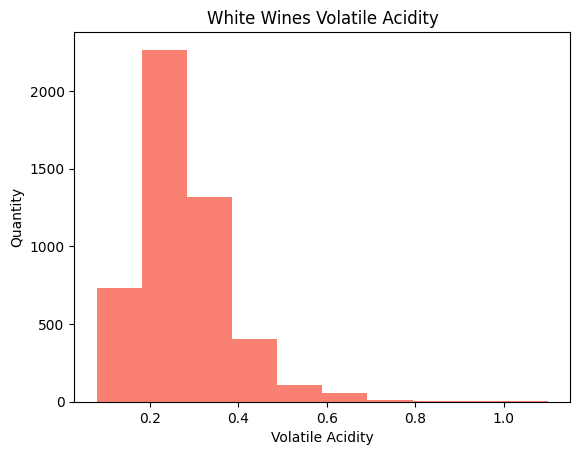

In [56]:
quality_data_1["volatile_acidity"].plot(kind="hist",
                                   color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wines Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quantity")

Text(0, 0.5, 'Quantity')

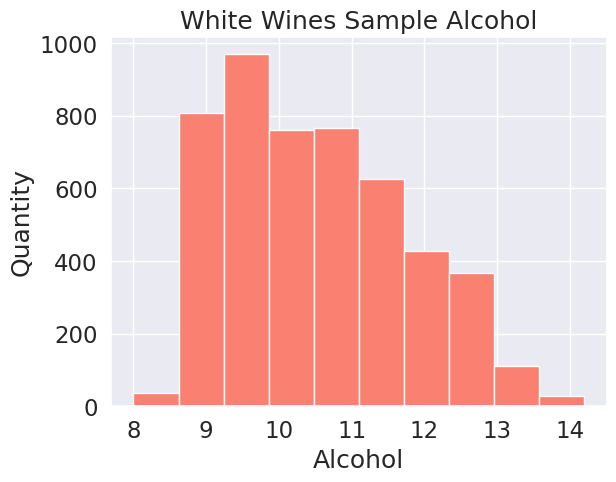

In [74]:
quality_data_1["alcohol"].plot(kind="hist",
                               color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wines Sample Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Quantity")

Text(0, 0.5, 'Free sulfur Dioxide')

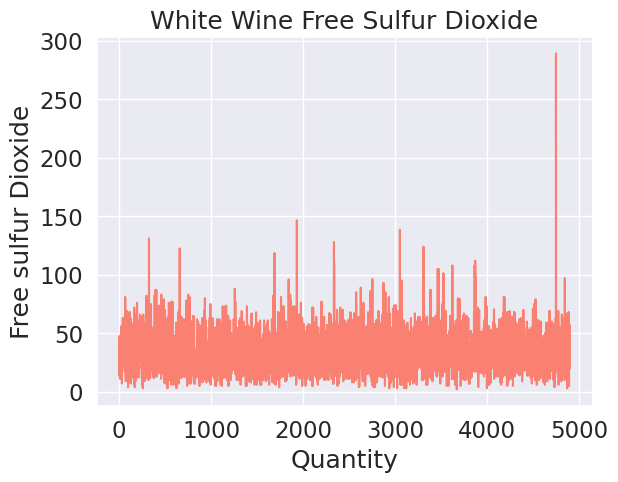

In [76]:
quality_data_1["free_sulfur_dioxide"].plot(kind="line",
                                     color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wine Free Sulfur Dioxide")
plt.xlabel("Quantity")
plt.ylabel("Free sulfur Dioxide")

Text(0, 0.5, 'Quantity')

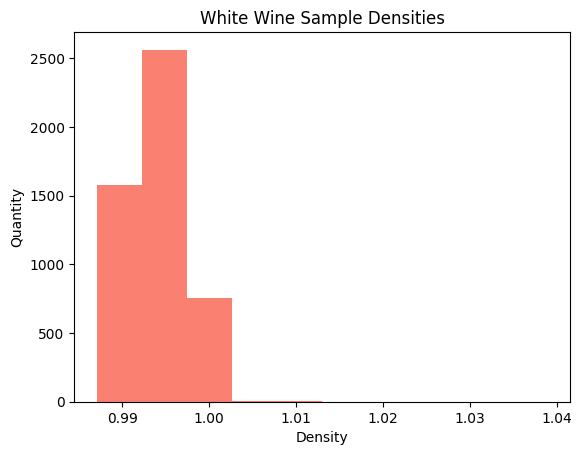

In [63]:
quality_data_1["density"].plot(kind="hist",
                                     color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wine Sample Densities")
plt.xlabel("Density")
plt.ylabel("Quantity")

Text(0, 0.5, 'Total Free Sulfur Dioxide')

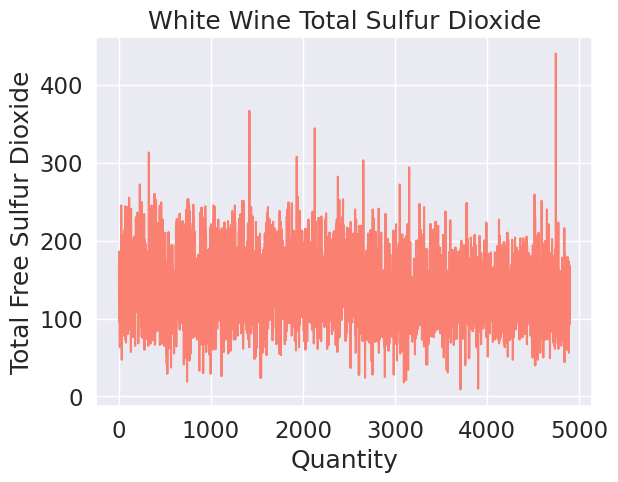

In [78]:
quality_data_1["total_sulfur_dioxide"].plot(kind="line",
                                     color=["salmon", "lightblue"]);

# Add some information to the graph
plt.title("White Wine Total Sulfur Dioxide")
plt.xlabel("Quantity")
plt.ylabel("Total Free Sulfur Dioxide")

## Model Evaluation

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision Score
* f1-score

In [65]:
# Make predictions with tuned model
y_preds = clf_1.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [66]:
y_test

4656    1
3659    1
907     1
4352    0
3271    1
       ..
3207    1
1539    1
964     1
168     0
3661    1
Name: target, Length: 980, dtype: int64

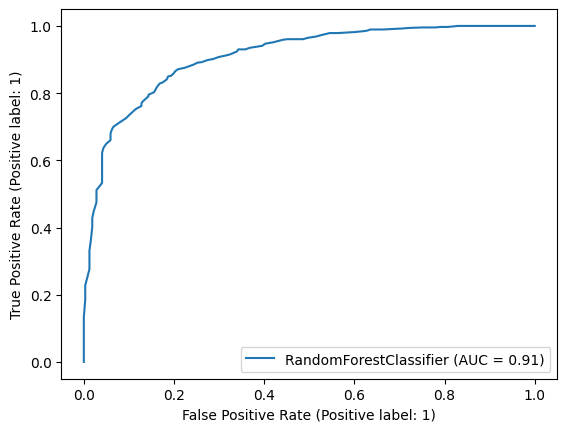

In [67]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=clf_1,
                               X=X_test,
                               y=y_test);


In [68]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[233  88]
 [ 67 592]]


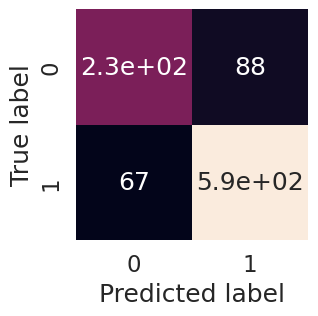

In [69]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    # Predictions go on the x-axis
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       321
           1       0.87      0.90      0.88       659

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [73]:
pd.crosstab(quality_data_1["pH"], quality_data_1["target"])

target,0,1
pH,,
2.72,0,1
2.74,0,1
2.77,0,1
2.79,3,0
2.80,1,2
...,...,...
3.77,2,0
3.79,1,0
3.80,0,2
